# 目標

不動点と系の関係を知る．

不動点分析の意義を知る．


# 不動点

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: (不動点，平衡点，固定点)

</div>
<div>

$f: M \rightarrow M$ なる $f$ に対して， $f(x) = x$ なる $x\in M$ を $f$ の不動点という[[1](#footnote1)]．

</div>
</div>

<br />

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**具体例**: (不動点)

</div>
<div>

$\mathbb{R}$ 上の写像である [ロジスティック写像](./logistic_growth.ipynb) $f_{a}(x) = ax(1-x)$ は $a\neq 0$ で $x = 0, \frac{a-1}{a}$ を不動点にもつ．

$\mathbb{R}^2$ 上の写像である [エノン写像](./draft/henon_map.ipynb) $f(x, y) = (a - x^2 + by, x)$ は
$\left(\frac{b-1\pm\sqrt{(b-1)^2 + 4a}}{2}, \frac{b-1\pm\sqrt{(b-1)^2 + 4a}}{2}\right)$ を不動点に持つ．

</div>
</div>

ロジスティック写像の不動点と周期軌道の分岐の様子を以下に示す．


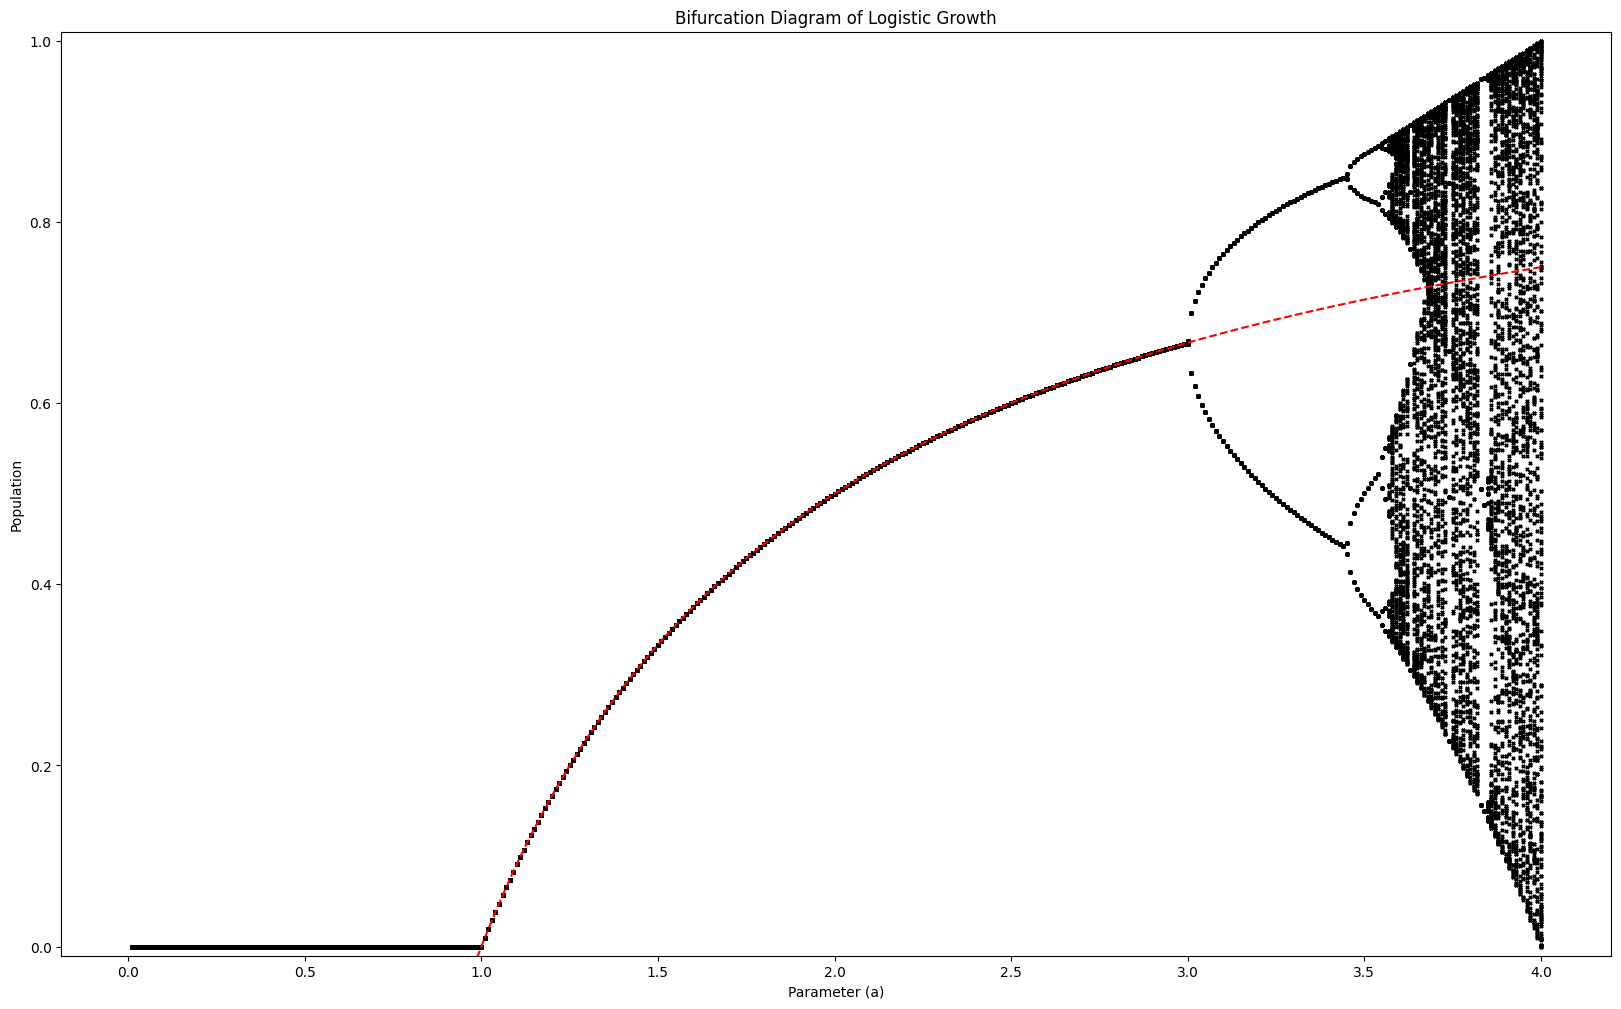

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from model.logistic_growth import DiscreteLogisticGrowth

# ステップ数
steps = 19800

# シミュレーションする係数 a 群
a_array = np.arange(0.01, 4.01, 0.01)

rng = np.random.default_rng()

# シミュレーション結果を格納する行列
X = np.zeros((len(a_array), 200))

for i, a in enumerate(a_array):
    m = DiscreteLogisticGrowth(a)
    # 初期値は 0.0 ~ 1.0 までの乱数
    x: float = rng.random()
    for _ in range(steps):
        x = m.model(x)

    # 最後の 200 個を周期点として回収する
    X[i, 0] = x
    for j in range(199):
        x = m.model(x)
        X[i, j + 1] = x

fixed_points = (a_array - 1) / a_array

plt.figure(figsize=(20, 12))
for i in range(len(a_array)):
    plt.scatter([a_array[i]] * 200, X[i], color="black", marker="x", s=5)
plt.ylim(-0.01, 1.01)
plt.plot(a_array, fixed_points, linestyle="--", color="r", markersize=0.1)
plt.xlabel("Parameter (a)")
plt.ylabel("Population")
plt.title("Bifurcation Diagram of Logistic Growth")
plt.show()

上の図のように，ロジスティック写像の場合，写像のパラメータ $a$ によって不動点に収束するものと２周期以上の周期軌道に収束するものがあることがわかる．
このような系の変化を**分岐**といい，　システムの制御をするうえで重要な現象である．


## 不動点の分類

系の性質を理解するには，不動点の分析が必要である．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**具体例**: (不動点と分岐)

</div>
<div>

パラメータの変化によって伴う安定不動点と不安定不動点が接近して合体し消滅する分岐現象をサドル・ノード分岐と呼ぶ[[2](#footnote2)]．

</div>
</div>

<br />

上の具体例で述べたように不動点の安定性を分析することは
分岐の分析につながる．


### $\mathbb{R}$ 上の写像における不動点

まずは， $\mathbb{R}$ 上の写像であるロジスティック写像を用いて不動点の安定性について考察する．

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: (沈点，吸引的不動点)

</div>
<div>

$f$ を $\mathbb{R}$ 上の写像とするとき，
$f(p) = p$ なる不動点 $p$ において， $p$ に十分近い全ての点が $p$ に吸引されるとき， $p$ を**沈点**あるいは**吸引的不動点**という[[1](#footnote1)]．

</div>
</div>

<br />

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: (源点，反発的不動点)

</div>
<div>

$f$ を $\mathbb{R}$ 上の写像とするとき，
$f(p) = p$ なる不動点 $p$ において， $p$ に十分近い全ての点が $p$ から離れる時， $p$ を**源点**あるいは**反発的不動点**という[[1](#footnote1)]．

</div>
</div>

<br />

<figure style="display: flex; justify-content: space-between; max-width: 800px; margin: 0 auto; align-items:center;">
  <div style="flex-basis: 48%; text-align: center;">
    <img src="./img/sinking_point.png" alt="沈点" style="max-width: 100%; height: auto; object-fit: contain; border: 2px solid #ccc; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <figcaption style="font-style: italic; font-size: 0.8em; color: #666; margin-top: 5px;">沈点</figcaption>
  </div>
  <div style="flex-basis: 48%; text-align: center;">
    <img src="./img/source_point.png" alt="源点" style="max-width: 100%; height: auto; object-fit: contain; border: 2px solid #ccc; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <figcaption style="font-style: italic; font-size: 0.8em; color: #666; margin-top: 5px;">源点</figcaption>
  </div>
</figure>


### $\mathbb{R}^{m}$ 上の写像における不動点

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: (沈点，源点[[1](#footnote1)])

</div>
<div>

$f$ を $\mathbb{R}^{m}$ 上の写像とし， $\boldsymbol{p}$ を $\mathbb{R}^{m}$ 内の不動点，すなわち $\boldsymbol{f}(\boldsymbol{p}) = \boldsymbol{p}$
とする． $\epsilon$-近傍 $N_{\epsilon}(\boldsymbol{p})$ 内の任意の点 $\boldsymbol{v}$ に対して $\lim_{k\rightarrow\infty}\boldsymbol{f}^k(\boldsymbol{v}) = \boldsymbol{p}$
となるような $\epsilon > 0$ が存在するならば， $\boldsymbol{p}$ は **沈点** または **吸引的不動点** である． $\boldsymbol{p}$ 以外の任意の近傍内の点が最終的に近傍外に移るような $\epsilon$ 近傍が
存在するならば， $\boldsymbol{p}$ は**源点** または **反発的不動点** である．

</div>
</div>

上述の吸引的，反発的に当てはまらない不動点を**中性的**(**中立的**)という[[3](#footnote3)]．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**具体例**: (沈点)

</div>
<div>

$a = 1.20$, $b = -0.3$ におけるエノン写像の不動点 $(0.62377, 0.62377)$
は沈点である．

</div>
</div>


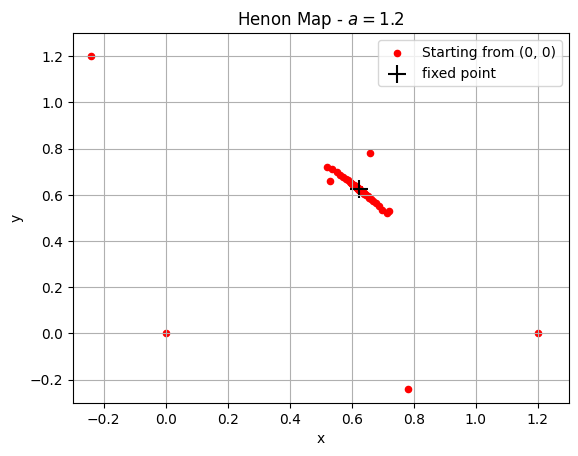

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dynamical_system.model.henon_map import HenonMap

m = HenonMap(1.2, -0.3)

x_init, y_init = 0, 0

steps = 500

XY: np.ndarray = m.simulate(x_init, y_init, steps)

fp = m.fixed_points()

plt.scatter(XY[:, 0], XY[:, 1], color="r", label="Starting from (0, 0)", s=20)
plt.scatter(fp[:, 0], fp[:, 1], color="black", marker="+", s=150, label="fixed point")
plt.title("Henon Map - $a = 1.2$")
plt.xlim(-0.3, 1.3)
plt.ylim(-0.3, 1.3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#### 中性的な不動点

$\mathbb{R}^2$ 上の中性的な不動点として以下のようなものがある．

<figure style="width: 100%; max-width: 500px; margin: 0 auto; text-align: center;">
  <img src="./img/other_points.png" alt="沈点でも源点でもない不動点" style="max-width: 100%; height: auto; object-fit: contain; border: 2px solid #ccc; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
  <figcaption style="font-style: italic; font-size: 0.8em; color: #666; margin-top: 5px;">沈点でも原点でもない不動点</figcaption>
</figure>

例えば， ロジスティック写像を 2 つ用いた以下の $\mathbb{R}^2$ 上の写像は中性的な不動点 $(0, 0)$ を持つ．

$$
\displaystyle{
  g(x,y) = \left(\frac{1}{2}x(1-x), 2y(1-y)\right)
}
$$

また回転行列による以下の写像も中性的な不動点 $(0, 0)$ を持つ．

$$
\displaystyle{
  h_{\theta}(x,y) = \left(\begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix}\right)^T
}
$$

ここで
$(0.1,0)$ と $(-0.02,-0.02)$ を初期値とし， $\theta = 0.1$ とした時のこれらの系の変化をシミレーションを以下に示す．


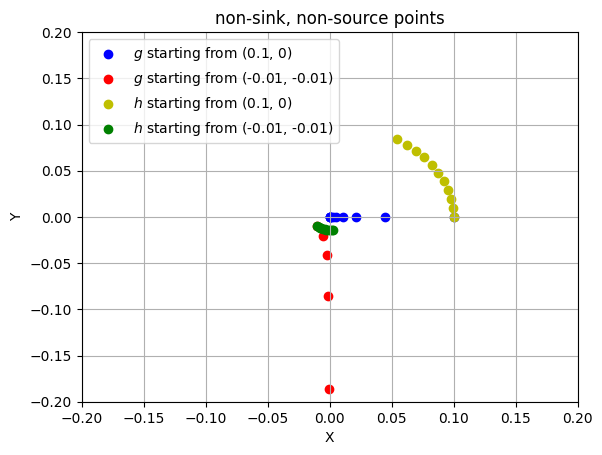

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def g(x: float, y: float):
    return (0.5 * x * (1 - x), 2 * y * (1 - y))


def h(x: float, y: float):
    return tuple(
        np.array([[np.cos(0.1), -np.sin(0.1)], [np.sin(0.1), np.cos(0.1)]])
        @ np.array([x, y])
    )


steps = 10

x_1_init, y_1_init = 0.1, 0
x_2_init, y_2_init = -0.01, -0.01

XY_1: np.ndarray = np.array([[x_1_init, y_1_init]])
XY_2: np.ndarray = np.array([[x_2_init, y_2_init]])
XY_3: np.ndarray = np.array([[x_1_init, y_1_init]])
XY_4: np.ndarray = np.array([[x_2_init, y_2_init]])

for _ in range(steps):
    x_1, y_1 = g(XY_1[-1][0], XY_1[-1][1])
    x_2, y_2 = g(XY_2[-1][0], XY_2[-1][1])
    x_3, y_3 = h(XY_3[-1][0], XY_3[-1][1])
    x_4, y_4 = h(XY_4[-1][0], XY_4[-1][1])
    XY_1 = np.vstack([XY_1, [x_1, y_1]])
    XY_2 = np.vstack([XY_2, [x_2, y_2]])
    XY_3 = np.vstack([XY_3, [x_3, y_3]])
    XY_4 = np.vstack([XY_4, [x_4, y_4]])

plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.scatter(XY_1[:, 0], XY_1[:, 1], color="b", label="$g$ starting from (0.1, 0)")
plt.scatter(XY_2[:, 0], XY_2[:, 1], color="r", label="$g$ starting from (-0.01, -0.01)")
plt.scatter(XY_3[:, 0], XY_3[:, 1], color="y", label="$h$ starting from (0.1, 0)")
plt.scatter(XY_4[:, 0], XY_4[:, 1], color="g", label="$h$ starting from (-0.01, -0.01)")
plt.title("non-sink, non-source points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

### ヤコビ行列

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: ヤコビ行列

</div>
<div>

$\boldsymbol{f} = (f_1, f_2,\dots,f_n)$ を $\mathbb{R}^{m}$ 上の写像とし， $\boldsymbol{p}\in\mathbb{R}^{m}$ とするとき，
$\boldsymbol{p}$ における $\boldsymbol{f}$ のヤコビ行列を $\boldsymbol{Df}(\boldsymbol{p})$ とし，

$$
\displaystyle{
    \boldsymbol{Df}(\boldsymbol{p}) =
\begin{pmatrix}
\frac{\partial}{\partial x_1} f_1(\boldsymbol{p}) & \frac{\partial}{\partial x_2} f_1(\boldsymbol{p}) & \cdots & \frac{\partial}{\partial x_m} f_1(\boldsymbol{p}) \\
\frac{\partial}{\partial x_1} f_2(\boldsymbol{p}) & \frac{\partial}{\partial x_2} f_2(\boldsymbol{p}) & \cdots & \frac{\partial}{\partial x_m} f_2(\boldsymbol{p}) \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial}{\partial x_1} f_n(\boldsymbol{p}) & \frac{\partial}{\partial x_2} f_n(\boldsymbol{p}) & \cdots & \frac{\partial}{\partial x_m} f_n(\boldsymbol{p})
\end{pmatrix}
}
$$

である．

</div>
</div>

<br />

ヤコビ行列を用いることで不動点の分析をより詳しく行うことができる．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**具体例**: (沈点，源点，サドルとヤコビ行列)[[1](#footnote1)]

</div>
<div>

$\boldsymbol{f}$ を $\mathbb{R}^{m}$ 上の写像とし $\boldsymbol{p}$ を不動点とするとき，

1. $\boldsymbol{Df}(\boldsymbol{p})$ の各固有値の絶対値が 1 より小さいとき， $\boldsymbol{p}$ は沈点
2. $\boldsymbol{Df}(\boldsymbol{p})$ の各固有値の絶対値が 1 より大きいとき， $\boldsymbol{p}$ は源点
3. 双曲的な行列 $\boldsymbol{Df}(\boldsymbol{p})$ で，絶対値が 1 より大きいものと小さいものが 1 つい上あるとき $\boldsymbol{p}$ はサドル(鞍点)

</div>
</div>

(行列が双曲的とは，どの固有値の実部も $0$ でないもののことである)

実際， 先述の写像 $g$ と $h$ の $(0, 0)$ におけるヤコビ行列は

$
\begin{pmatrix}
0.5 & 0 \\
0 & 2
\end{pmatrix}
$　，
$
\begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{pmatrix}
$ で
固有値はそれぞれ
$0.5, 2$ と $\cos\theta\pm i\sin\theta$
であり，前者はサドルとわかる．


<a id="footnote1">1</a>: K.T. アリグッド, T.D. サウアー, J.A. ヨーク著, 星野高志ほか訳『カオス : 力学系入門 (Chaos: Introduction to Dynamical Systems)』, シュプリンガー・ジャパン, 東京, Japan, 2006.12-2007.4, ISBN: 978-4-431-71236-7 [4431712364].

<a id="footnote2">2</a>: 小室元政著, 『基礎からの力学系 : 分岐解析からカオス的遍歴へ. 新版』, サイエンス社, 東京, Japan, 2005.12
ISBN: 9784781911182 [4781911188].

<a id="footnote3">3</a>: Morris W. Hirsch, Stephen Smale, Robert L. Devaney 著, 桐木紳ほか訳 『力学系入門 : 微分方程式からカオスまで』, 共立出版, 東京, Japan, 2017.1, ISBN: 9784320111363 [4320111362].
